In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
# Preprocessing - Scale down between [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building Model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

2022-09-03 18:39:58.990344: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-03 18:39:58.990413: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Notebook
2022-09-03 18:39:58.990430: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Notebook
2022-09-03 18:39:58.990610: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-03 18:39:58.990669: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-03 18:39:58.990682: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1
2022-09-03 18:39:58.992137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical op

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [10]:
model.fit(train_images, train_labels, epochs = 1)  # we pass the data, labels and epochs and watch the magic!

  41/1875 [..............................] - ETA: 4s - loss: 0.2469 - accuracy: 0.9108

2022-09-03 18:46:42.397118: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 28s 15ms/step - loss: 0.2337 - accuracy: 0.9134


In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.3500 - accuracy: 0.8808
Test accuracy: 0.8808000087738037


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 13ms/step


array([4.3176135e-10, 2.9541586e-12, 1.4018848e-13, 1.0917281e-14,
       1.8056773e-10, 7.4399446e-05, 2.6616045e-09, 4.0946653e-04,
       2.5042788e-09, 9.9951607e-01], dtype=float32)

Pullover


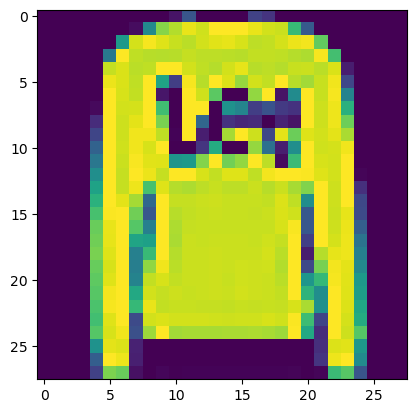

In [22]:
print(class_names[np.argmax(predictions[1])])
plt.imshow(test_images[1])

## Script 

1/1 [==============================] - 0s 97ms/step


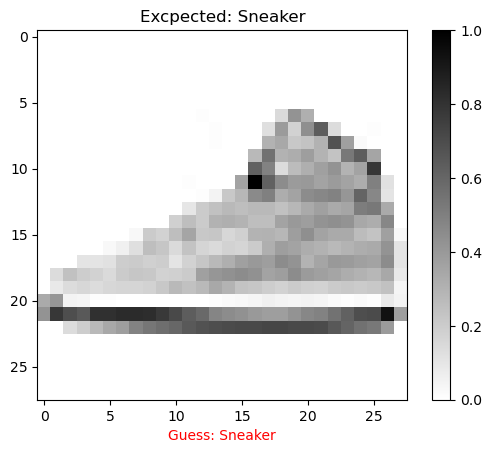

In [29]:
black = 'black'
red = 'red'
plt.rcParams['text.color'] = black
plt.rcParams['axes.labelcolor'] = red

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
